In [1]:
import urllib.request
from PIL import Image
import numpy as np

In [2]:
urllib.request.urlretrieve("https://ichef.bbci.co.uk/news/660/cpsprodpb/E7FE/production/_98009395_captuvgaefgq324t5r13re.jpg", "./images/bbc_pr.jpg")

('./images/bbc_pr.jpg', <http.client.HTTPMessage at 0x7f4fc80d4cf8>)

In [3]:
img = Image.open("./images/bbc_pr.jpg")
img = img.convert("L")
img = img.resize((660*2,472*2))

In [4]:
bef = img.crop((59*2, 4*2, 530*2, 176*2))
aft = img.crop((59*2, 289*2, 530*2, 461*2))
chg = np.array(bef, dtype=int) - np.array(aft, dtype=int)
chg = np.maximum(chg, 0)

In [5]:
rgbArray = np.zeros((172*2,471*2,3), 'uint8')
rgbArray[..., 0] = chg
img = Image.fromarray(rgbArray)
img.save("./images/blackout_areas.jpg")

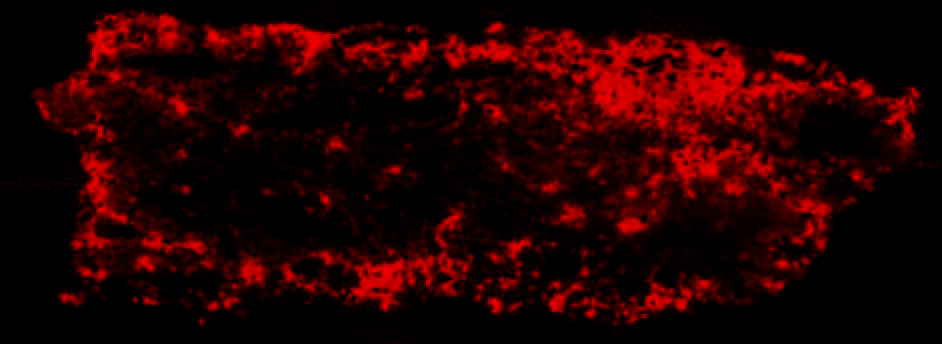

In [6]:
img

In [7]:
rgbArray = np.zeros((172*2,471*2,3), 'uint8')
rgbArray[..., 0] = bef
rgbArray[..., 1] = aft
rgbArray[..., 2] = aft
img2 = Image.fromarray(rgbArray)
img2.save("./images/blackout_areas2.jpg")

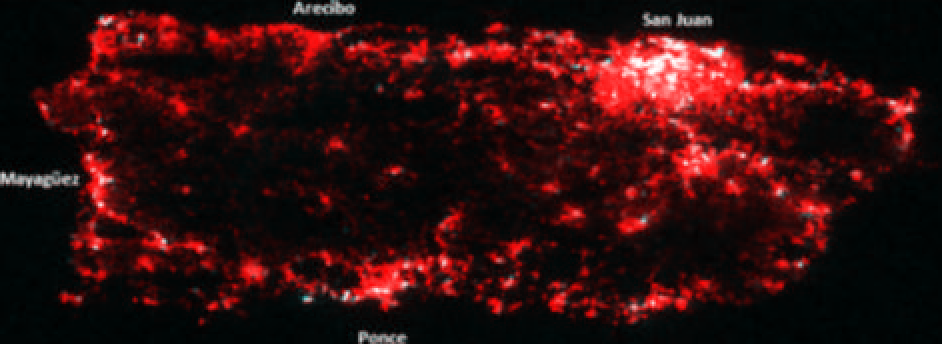

In [8]:
img2